In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '../data/telco_churn_prepared.csv'
df = pd.read_csv(file_path)


print('Dimensions :', df.shape)
df.head()

Dimensions : (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-1.280248,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,No
1,Male,0,No,No,0.064303,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740,No
2,Male,0,No,No,-1.239504,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,Yes
3,Male,0,No,No,0.512486,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,No
4,Female,0,No,No,-1.239504,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,Yes


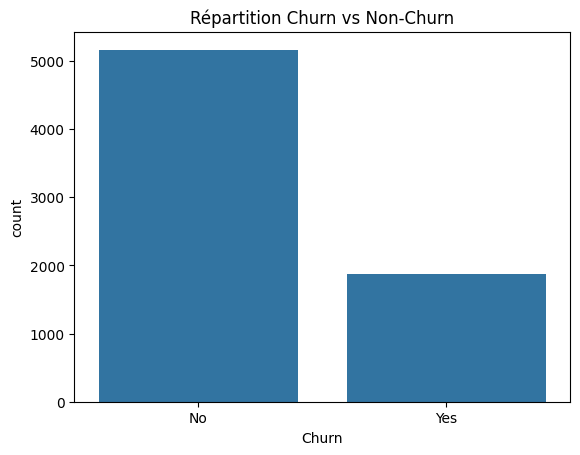

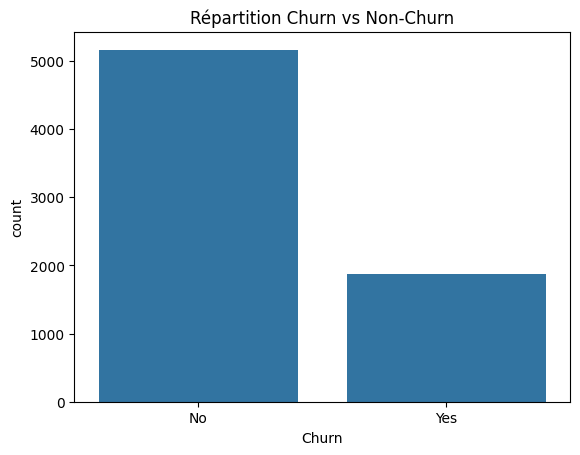

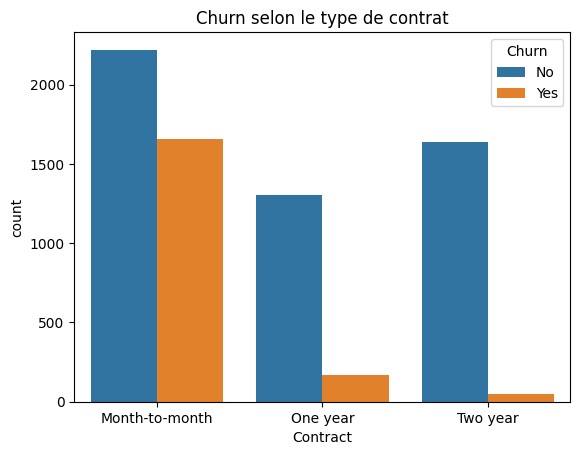

In [ ]:

sns.countplot(x='Churn', data=df)
plt.title('Répartition Churn vs Non-Churn')
plt.show()


sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn selon le type de contrat')
plt.show()


if 'TotalServices' in df.columns:
    sns.histplot(data=df, x='TotalServices', hue='Churn', multiple='stack')
    plt.title('Churn selon le nombre de services')
    plt.show()

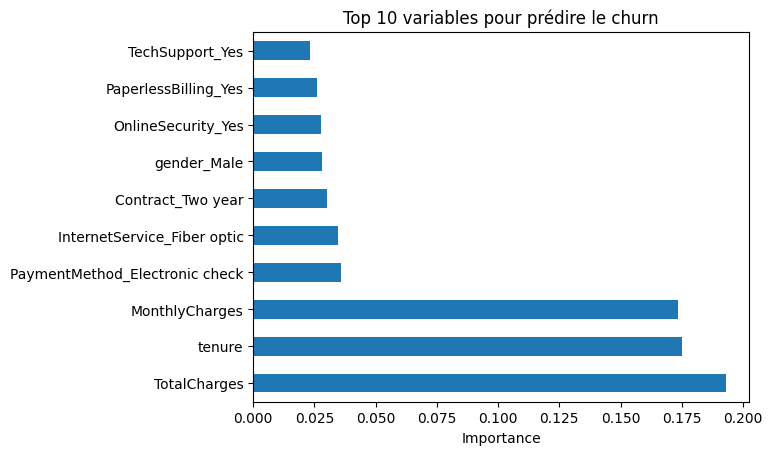

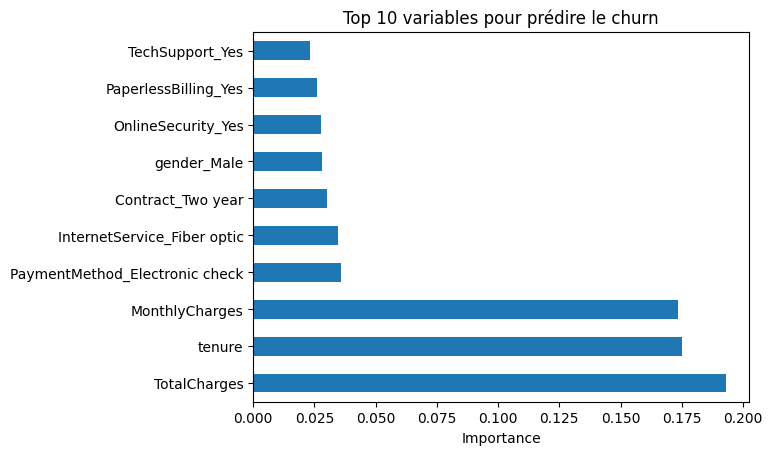

Modèle sauvegardé avec succès dans models/.


In [ ]:

import joblib
from sklearn.ensemble import RandomForestClassifier


X = df.drop('Churn', axis=1)
y = df['Churn']

X = pd.get_dummies(X, drop_first=True)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)


importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 variables pour prédire le churn')
plt.xlabel('Importance')
plt.show()

joblib.dump(model,"../models/random_forest_model.pkl")
print("Modèle sauvegardé avec succès dans models/.")
